<a href="https://colab.research.google.com/github/GinnaJoby/Temperature-data-analysis/blob/main/Copy_of_Temperature_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
df_temp = pd.read_csv("temperature.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'temperature.csv'

In [ ]:
df_temp.head(5)

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [ ]:
df_temp['Date'] = df_temp['Date'].astype(str)
df_temp['Year'] = df_temp['Date'].str[:4]
df_temp['Month-Day'] =df_temp['Date'].str[5:]

In [ ]:
df_temp = df_temp[df_temp['Month-Day'] != '02-29']

In [ ]:
df_2005_2014 = df_temp[df_temp['Year'].astype(int) < 2015]

In [ ]:
record_highs = df_2005_2014[df_2005_2014['Element'] == 'TMAX'].groupby('Month-Day')['Data_Value'].max()
record_lows = df_2005_2014[df_2005_2014['Element'] == 'TMIN'].groupby('Month-Day')['Data_Value'].min()

In [ ]:
df_2015 = df_temp[df_temp['Year'] == '2015']

In [ ]:
highs_2015 = df_2015[df_2015['Element'] == 'TMAX'].groupby('Month-Day')['Data_Value'].max()
lows_2015 = df_2015[df_2015['Element'] == 'TMIN'].groupby('Month-Day')['Data_Value'].min()

In [ ]:
record_high_broken = highs_2015[highs_2015 > record_highs]
record_low_broken = lows_2015[lows_2015 < record_lows]

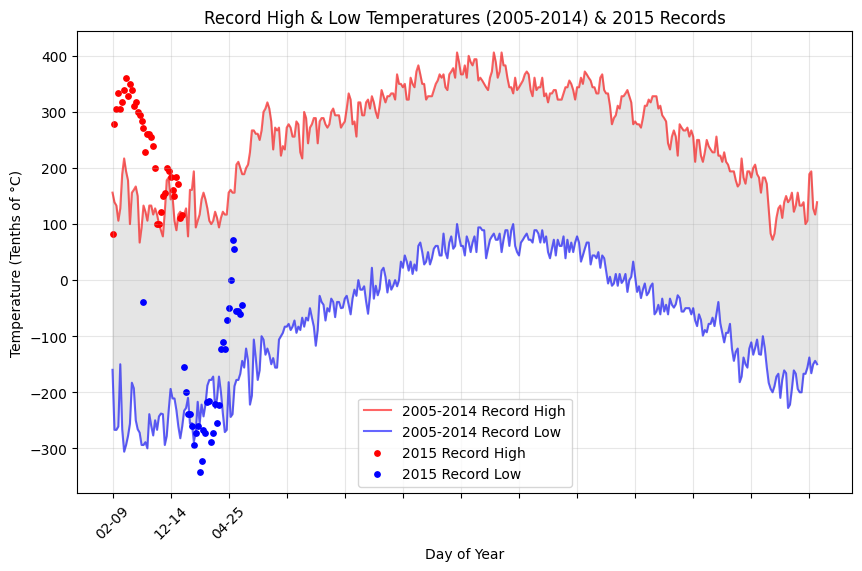

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(record_highs.values, 'r-', alpha=0.6, label="2005-2014 Record High")
plt.plot(record_lows.values, 'b-', alpha=0.6, label="2005-2014 Record Low")

plt.fill_between(range(len(record_highs)), record_lows, record_highs, color='grey', alpha=0.2)

plt.scatter(record_high_broken.index, record_high_broken.values, c='red', label="2015 Record High", s=15)
plt.scatter(record_low_broken.index, record_low_broken.values, c='blue', label="2015 Record Low", s=15)

plt.xlabel('Day of Year')
plt.ylabel('Temperature (Tenths of °C)')
plt.title('Record High & Low Temperatures (2005-2014) & 2015 Records')
plt.xticks(range(0, len(record_highs), 30), rotation=45)
plt.legend()
plt.grid(alpha=0.3)

plt.show()

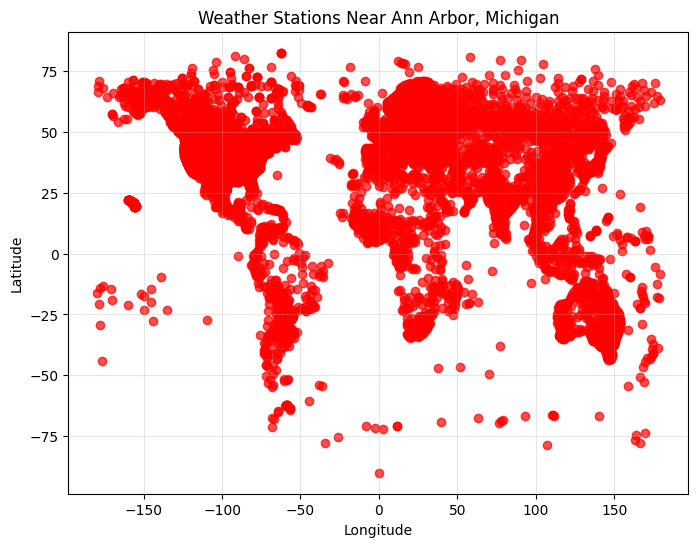

In [ ]:
stations = pd.read_csv('BinSize.csv')

plt.figure(figsize=(8,6))
plt.scatter(stations['LONGITUDE'], stations['LATITUDE'], color='red', alpha=0.7)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Weather Stations Near Ann Arbor, Michigan")
plt.grid(alpha=0.3)

plt.show()

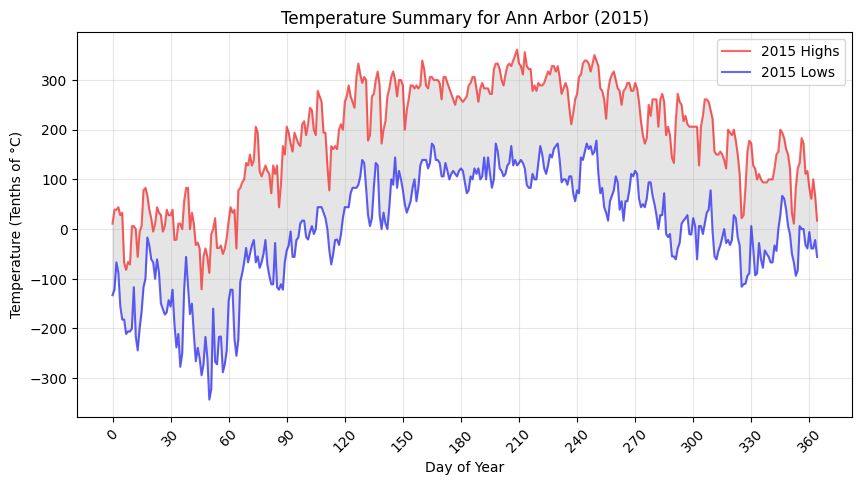

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(highs_2015.values, 'r-', alpha=0.6, label="2015 Highs")
plt.plot(lows_2015.values, 'b-', alpha=0.6, label="2015 Lows")

plt.fill_between(range(len(highs_2015)), lows_2015, highs_2015, color='grey', alpha=0.2)

plt.xlabel('Day of Year')
plt.ylabel('Temperature (Tenths of °C)')
plt.title('Temperature Summary for Ann Arbor (2015)')
plt.xticks(range(0, len(highs_2015), 30), rotation=45)
plt.legend()
plt.grid(alpha=0.3)

plt.show()